In [1]:
import seaborn as sns

In [2]:
df =sns.load_dataset('titanic')

In [3]:
##  Check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
## delete the row or data having missing values

df.shape

(891, 15)

In [5]:
df.dropna().shape

(182, 15)

In [6]:
## Column wise 
##df.dropna(axis=1,inplace = True)

## imputation Missing techniques

1- Mean Value Imputation

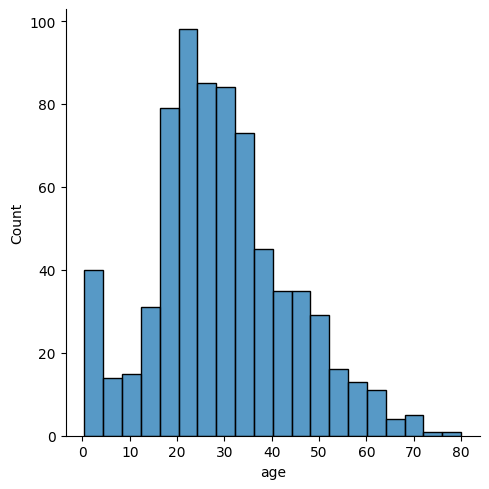

In [7]:
sns.displot(df['age'])

<Axes: xlabel='age', ylabel='Count'>

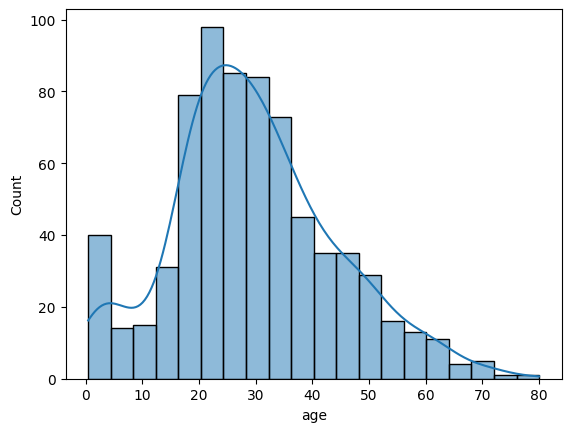

In [8]:
sns.histplot(df['age'],kde = True)

In [9]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [10]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### 2- Median Value Imputation

In [11]:
##  Mean impultation works well when we have normally distributed table data
df['age_median'] = df['age'].fillna(df['age'].median())

In [12]:
df[['age_median','Age_mean','age']]

,age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


#### 3. Mode Imputation Technique - Categorical Values

In [13]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [14]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
mode_value =df[df['embarked'].notna()]['embarked'].mode()

In [16]:
df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [17]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [18]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [19]:
df['embarked_mode'].isnull().sum()

np.int64(2)

In [20]:
df.isnull().sum()

survived           0
pclass             0
sex                0
age              177
sibsp              0
parch              0
fare               0
embarked           2
class              0
who                0
adult_male         0
deck             688
embark_town        2
alive              0
alone              0
Age_mean           0
age_median         0
embarked_mode      2
dtype: int64

## Handling Imbalanced Dataset

##### 1. Up Sampling
##### 2. Down Sampling

In [21]:
import numpy as np
import pandas as pd

# Set the random seed for reproductivity

#Create a dataframe with two classes

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0

In [22]:
n_class_0 ,n_class_1

(900, 100)

In [23]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET

class_0 = pd.DataFrame(
    {
        'feature_1' : np.random.normal(loc=0,scale = 1,size = n_class_0),
        'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0), 
        'target':[0]*n_class_0
    }
)
class_1 = pd.DataFrame({
    'feature_1':np.random.normal(loc = 2 ,scale = 1 , size = n_class_1),
    'feature_2' : np.random.normal(loc=2,scale=1,size = n_class_1),
    'target' : [1]*n_class_1
}

)

In [24]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [25]:
df.tail()

,feature_1,feature_2,target
995,3.525543,2.437929,1
996,-0.201525,0.988544,1
997,2.337348,3.004916,1
998,2.159695,1.260094,1
999,0.647028,1.137646,1


In [26]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [27]:
## Upsampling 
df_minority =df[df['target']==1]

df_majority =df[df['target']==0]

In [28]:
from sklearn.utils import resample 
df_minority_upsampled  = resample(
    df_minority,replace = True , #Sample with replacement 
 n_samples = len(df_majority),
random_state =  42

)


In [29]:
df_minority_upsampled.shape

(900, 3)

In [30]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.569569,2.950836,1
992,3.373210,2.605738,1
914,1.436521,2.352861,1
971,1.808547,2.585543,1
960,0.502096,1.462109,1


In [31]:
pip install scikit-learn

In [32]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [33]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [34]:
## DownSampling 

class_0 = pd.DataFrame(
    {
        'feature_1' : np.random.normal(loc=0,scale = 1,size = n_class_0),
        'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0), 
        'target':[0]*n_class_0
    }
)
class_1 = pd.DataFrame({
    'feature_1':np.random.normal(loc = 2 ,scale = 1 , size = n_class_1),
    'feature_2' : np.random.normal(loc=2,scale=1,size = n_class_1),
    'target' : [1]*n_class_1
}

)

df=pd.concat([class_0,class_1]).reset_index(drop=True)



In [35]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [36]:
df_minority =df[df['target']==1]

df_majority =df[df['target']==0]

In [37]:
from sklearn.utils import resample 
df_majority_downshaped  = resample(
    df_majority,replace = False , #Sample with replacement 
 n_samples = len(df_minority),
random_state =  42

)

In [38]:
df_majority_downshaped.shape

(100, 3)

In [39]:
df_downsampled =pd.concat([df_minority,df_majority_downshaped])

In [40]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

#### Handing Dataset using SMOTE( Synthetic Minority oversampling Technique)

It is technique in which it draws the line between two points 

In [41]:
from sklearn.datasets import make_classification

In [42]:
X,y =make_classification(n_samples=1000,n_redundant=0,n_features = 2,n_clusters_per_class=1,weights = [0.90],random_state = 12)

In [43]:
import pandas as pd
df1 = pd.DataFrame(X,columns = ['f1','f2'])
df2 = pd.DataFrame(y,columns = ['target'])
final_df = pd.concat([df1,df2],axis = 1)

final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [44]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

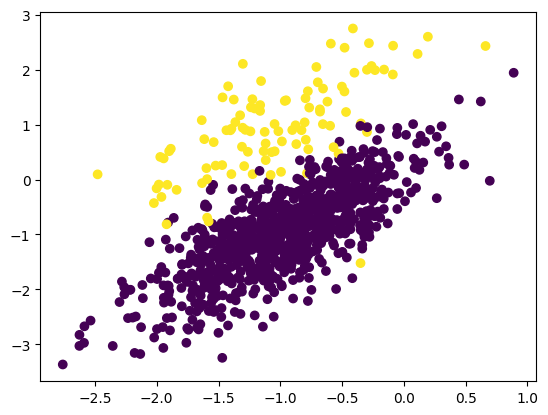

In [45]:
import matplotlib.pyplot as plt 
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])


In [46]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip  install SMOTE

Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
## transform the dataset 
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])
X.shape



(1800, 2)

In [50]:
y.shape

(1800,)

In [52]:
len(y[y==0])

900

In [53]:
import pandas as pd
df1 = pd.DataFrame(X,columns = ['f1','f2'])
df2 = pd.DataFrame(y,columns = ['target'])
oversample_df = pd.concat([df1,df2],axis = 1)

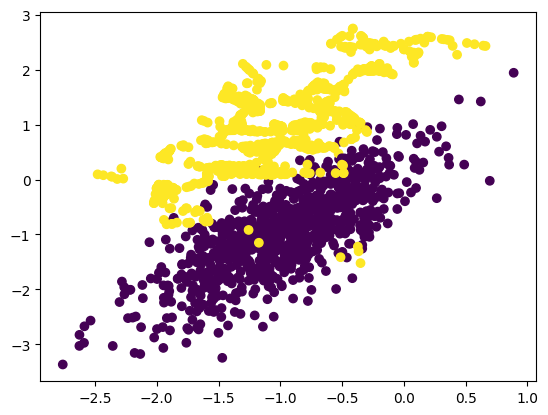

In [54]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c = oversample_df['target'])

### 5 number Summary and Boxplot 

In [55]:
## Minimum , Maxmium , Median , Q1,Q3 ,IQR
import numpy as np

In [56]:
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum = np.quantile(lst_marks,[0,0.25,0.5,0.75,1.0])

In [57]:
minimum,Q1,median,Q3,maximum

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [58]:
IQR = Q3 - Q1
print(IQR)

35.0


In [59]:
lower_fence =  Q1 - 1.5*(IQR)
higher_fence = Q3 + 1.5*(IQR)

In [60]:
lower_fence

np.float64(1.5)

In [61]:
higher_fence

np.float64(141.5)

In [62]:
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

In [63]:
import seaborn as sns

<Axes: >

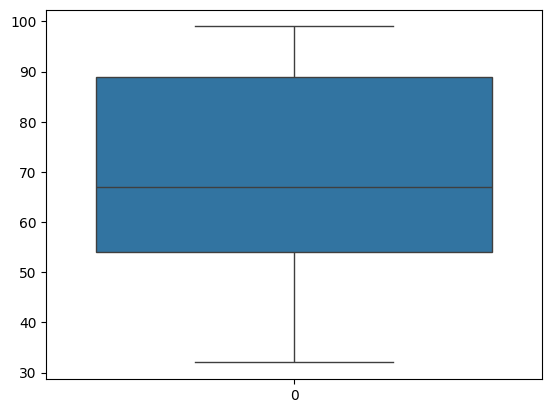

In [64]:
sns.boxplot([lst_marks])

In [65]:
lst_marks = [-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<Axes: >

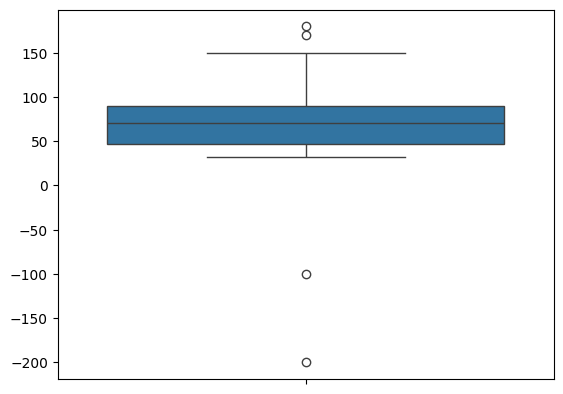

In [66]:
sns.boxplot(lst_marks)

## Data Encoding 

##### 1. Norminal/OHE encoding
##### 2. Label and Ordinal Encoding
##### 3. Target Guided Ordinal Encoding

 Data encoding means converting the categorical varaiables into numerical values as the model understand only the  numerical ones

1 . Norminal/ One hot encoding 

It is technique to show the categorical data as numerical data 

 1. Red : [1,0,0]
 2. Green : [0,1,0]
  3. Blue: [0,0,1]

In [68]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder

In [70]:
##  Create a simple dataframe 

df = pd.DataFrame(
    {
        'color' : ['red','blue','green','green','red','blue']
    }
)

In [71]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [76]:
## Create an instance for onehotencoder 

encoder = OneHotEncoder()

In [78]:
## perform fit and transform 

encoded =encoder.fit_transform(df[['color']]).toarray()

In [79]:
import pandas as pd 
encoder_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [80]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [82]:
## for new data
encoder.transform([['blue']]).toarray()

c:\Users\Lenovo\OneDrive\Documents\GitHub\Data-Science-Course\environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [83]:
pd.concat([df,encoder_df],axis = 1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


##### 2.Label Encoding

It assign unique values to categorical lables

In [84]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [85]:
from sklearn.preprocessing  import LabelEncoder

lbl_encoder = LabelEncoder()

In [86]:
lbl_encoder.fit_transform(df[['color']])

c:\Users\Lenovo\OneDrive\Documents\GitHub\Data-Science-Course\environment\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [87]:
lbl_encoder.transform([['red']])

c:\Users\Lenovo\OneDrive\Documents\GitHub\Data-Science-Course\environment\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [88]:
lbl_encoder.transform([['blue']])

c:\Users\Lenovo\OneDrive\Documents\GitHub\Data-Science-Course\environment\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

In [89]:
lbl_encoder.transform([['green']])

c:\Users\Lenovo\OneDrive\Documents\GitHub\Data-Science-Course\environment\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

###  Ordinal  encoding 

It is used to encode categorical data that have an intrinsic order or ranking 

In [91]:
## Ordinal Encoding 
from sklearn.preprocessing import OrdinalEncoder

In [92]:
df = pd.DataFrame(
    {
        'size':['small','medium','large','medium','small','large']
    }
)

In [93]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [94]:
## create an instance of OrdinalEncoding and fit_transform
encoder = OrdinalEncoder(categories=[['small','medium','large']])

In [95]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [97]:
encoder.transform([['small']])

c:\Users\Lenovo\OneDrive\Documents\GitHub\Data-Science-Course\environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

## target Guided Ordinal Encoding 

It encodes categorical variables based on their relationship with target variable . It replaced by the mean or median of categorical data 

In [98]:
import pandas as pd

df = pd.DataFrame(
    {
        'city' : ['New York','London','Paris','Tokyo','New york','Paris'],
        'price': [200,150,300,250,180,320]
    }
)

In [99]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New york,180
5,Paris,320


In [103]:
mean_price = df.groupby('city')['price'].mean().to_dict()

In [104]:
mean_price

{'London': 150.0,
 'New York': 200.0,
 'New york': 180.0,
 'Paris': 310.0,
 'Tokyo': 250.0}

In [105]:
df['city_encoded'] = df['city'].map(mean_price)

In [108]:
df[['price','city_encoded']]

,price,city_encoded
0,200,200.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,180.0
5,320,310.0
